In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def plot_xy(df, x, y):   
    x_axis = df[x]
    y_axis = df[y]
    
    plt.plot(x_axis, y_axis)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{y} vs {x}')
    plt.legend([y])
    plt.grid(True)
    plt.show()

In [5]:
def compare_plot(df, x, y1, y2, title):
    x_axis = df[x]
    y_1 = df[y1]
    y_2 = df[y2]
    
    plt.plot(x_axis, y_1)
    plt.plot(x_axis, y_2)
    plt.xlabel(x)
    # plt.ylabel(y)
    # plt.title(f'{y1},{y2} vs {x}')
    plt.title(title)
    plt.legend([y1, y2])
    plt.grid(False)
    plt.show()

In [41]:
df = pd.read_csv("data/car_table1a.csv", low_memory=False)
filtered_df = df[['Year','quarter','city1',
       'city2','nsmiles','passengers','carrier_lg','carrier_low','lf_ms','fare','fare_lg','fare_low']]

filtered_df = filtered_df.rename(columns={'city1':'Departure City',
       'city2':'Arrival City','nsmiles':'Distance Nautical Miles','passengers':'Number of Passengers','carrier_lg':'Top Mkt Share Carrier','carrier_low':'Lowest Fare Carrier','lf_ms':'Lowest Mkt Share Carrier','fare':'Average Fare','fare_lg':'TMSC Fare','fare_low':'Lowest Fare'})

In [42]:
sw_dfw = filtered_df[(filtered_df['Departure City'] == 'Dallas/Fort Worth, TX') & (filtered_df['Lowest Fare Carrier'] == 'WN')].reset_index(drop=True)

In [49]:
sw_dfw = sw_dfw.groupby(['Year']).agg({'Average Fare': 'mean','Lowest Fare':'mean'}).reset_index()
sw_dfw['Low/Avg Fare Ratio'] = sw_dfw['Lowest Fare']/sw_dfw['Average Fare']
sw_dfw['Avg/Low Fare Ratio'] = sw_dfw['Average Fare']/sw_dfw['Lowest Fare']
sw_dfw = sw_dfw[(sw_dfw['Year'] >= 1998)].reset_index(drop=True)

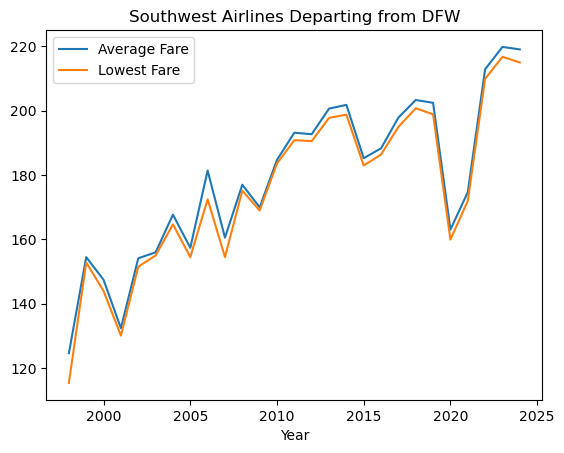

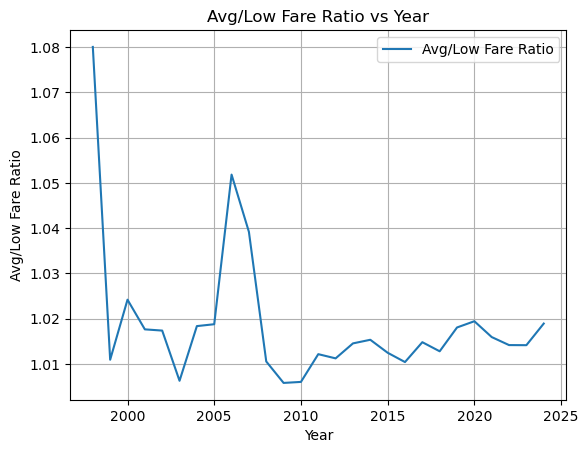

"\nAverage fare for flights departing from DFW compared to the lowest fare, where the lowest fare flights are\nall Southwest Airlines flights. DFW is the location of Southwest's HQ and they dominate the market at this airport, \nholding a percentage in the upper 90s for most flights out of DFW.\n\nThe message here is that with departing flights being dominated almost entirely by Southwest, on average the difference between\nan average fare price and the lowest available fare price is generally negligible. Southwest controls the prices of outbound \nflights and generally one will not be able to find anything significantly cheaper than your average price due.\n"

In [58]:
compare_plot(sw_dfw, 'Year', 'Average Fare', 'Lowest Fare', 'Southwest Airlines Departing from DFW')
plot_xy(sw_dfw, 'Year', 'Avg/Low Fare Ratio')

'''
Average fare for flights departing from DFW compared to the lowest fare, where the lowest fare flights are
all Southwest Airlines flights. DFW is the location of Southwest's HQ and they dominate the market at this airport, 
holding a percentage in the upper 90s for most flights out of DFW.

The message here is that with departing flights being dominated almost entirely by Southwest, on average the difference between
an average fare price and the lowest available fare price is generally negligible. Southwest controls the prices of outbound 
flights and generally one will not be able to find anything significantly cheaper than your average price due.
'''